<a href="https://colab.research.google.com/github/2303a51329/AIML/blob/main/ass8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.
Accuracy:1.0
ClassReport:              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       972

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382

Confusion Matrix:[[410   0]
 [  0 972]]
Fitting 3 folds for each of 5400 candidates, totalling 16200 fits


NameError: name 'accuracy' is not defined

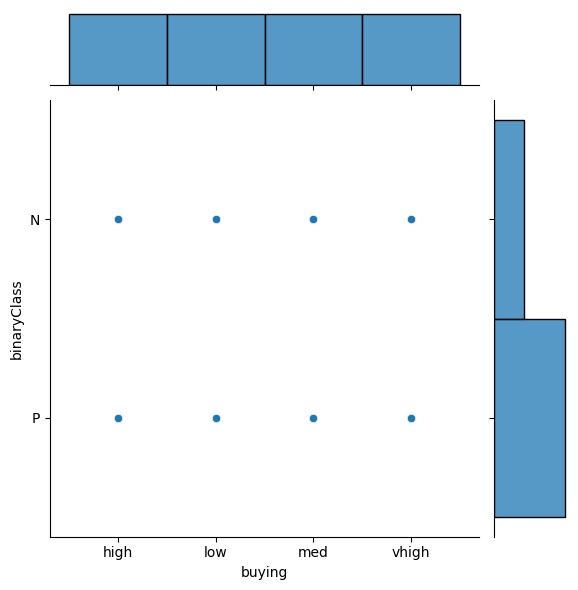

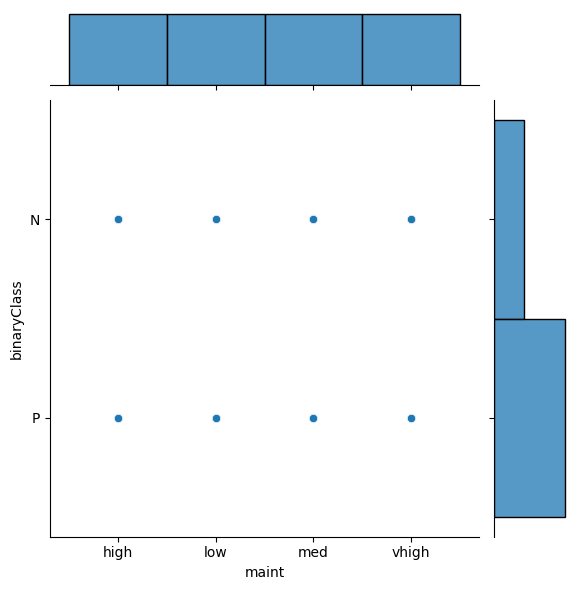

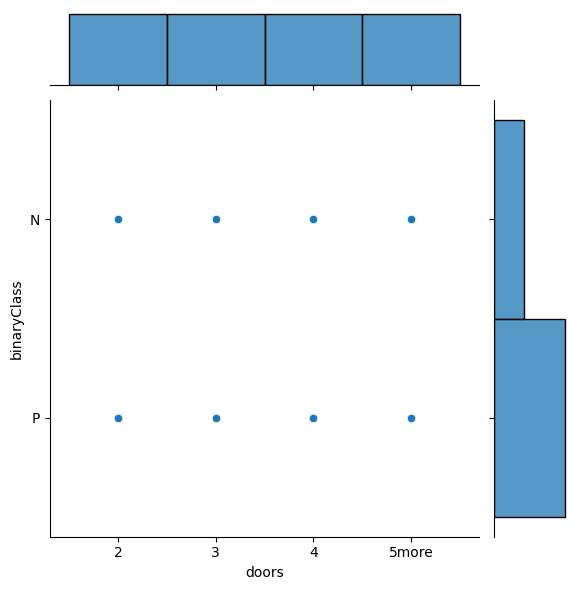

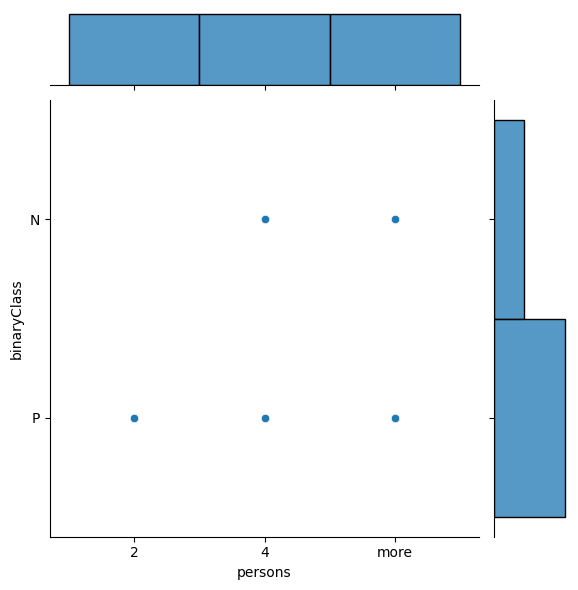

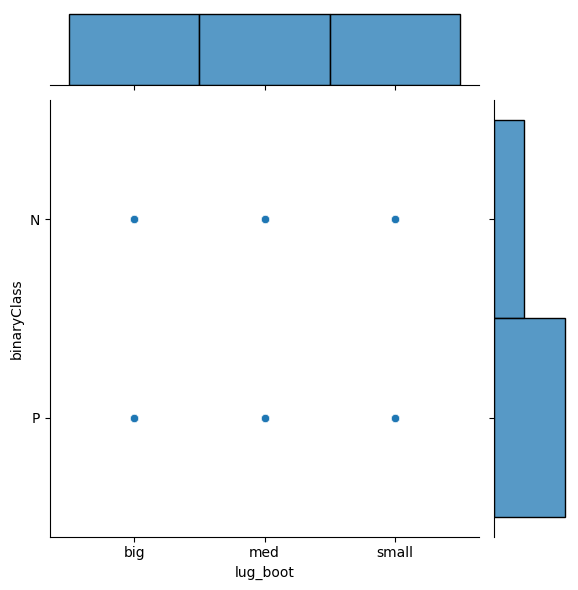

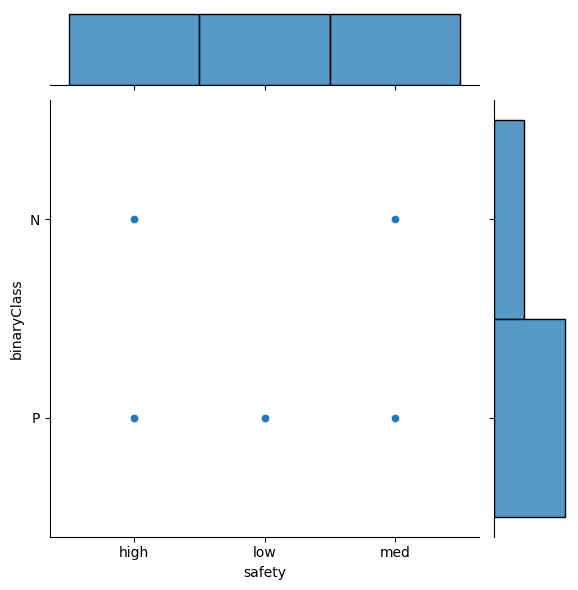

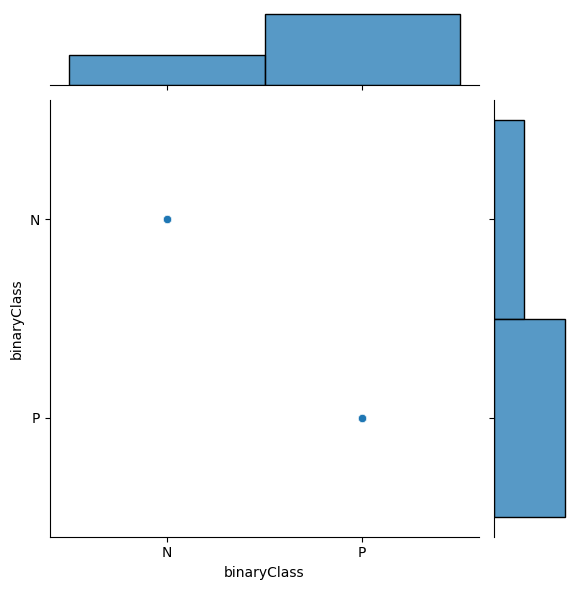

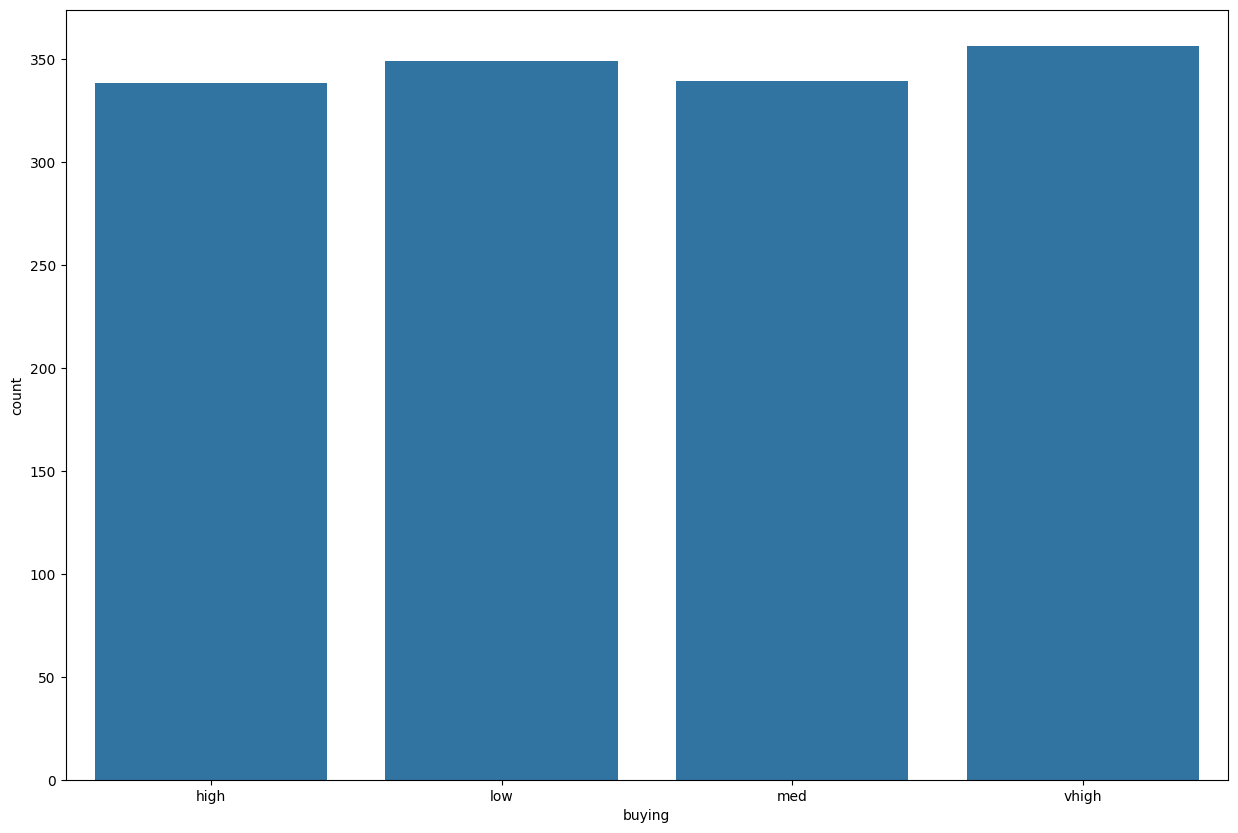

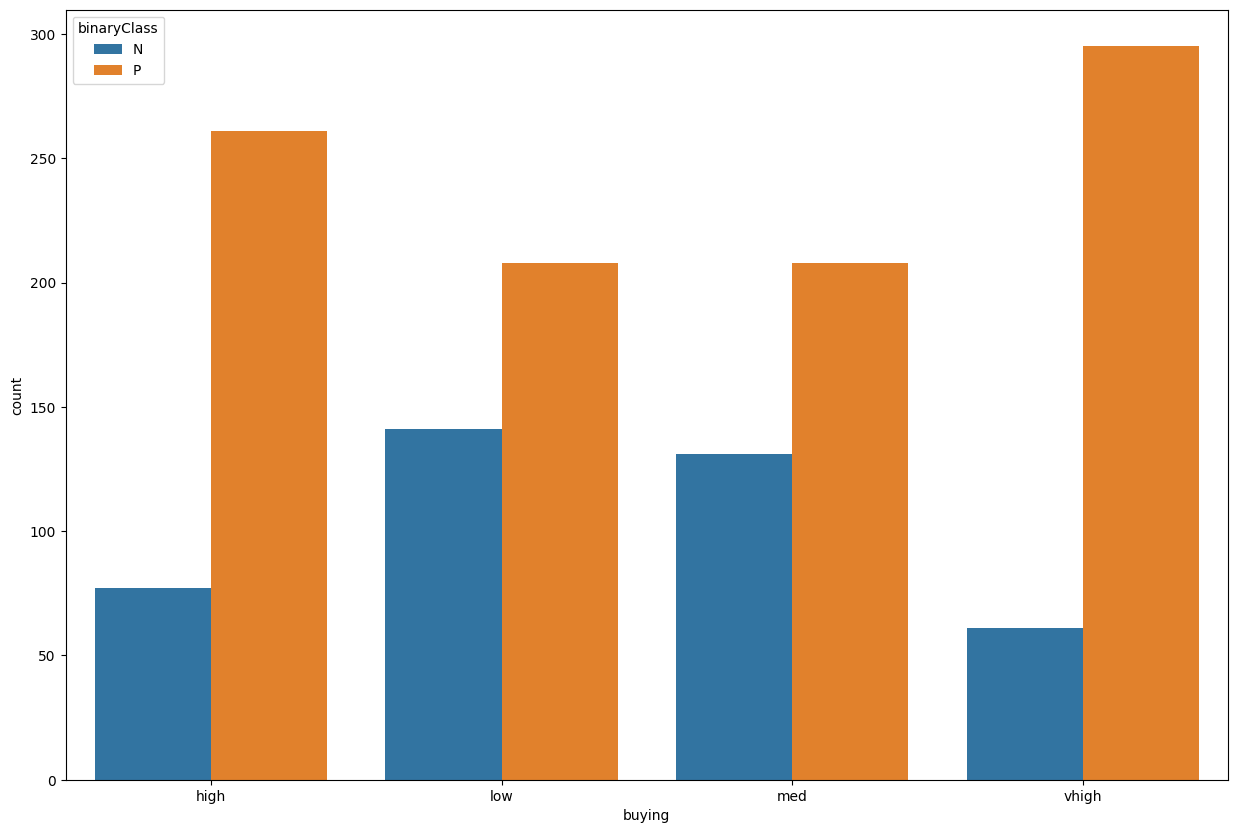

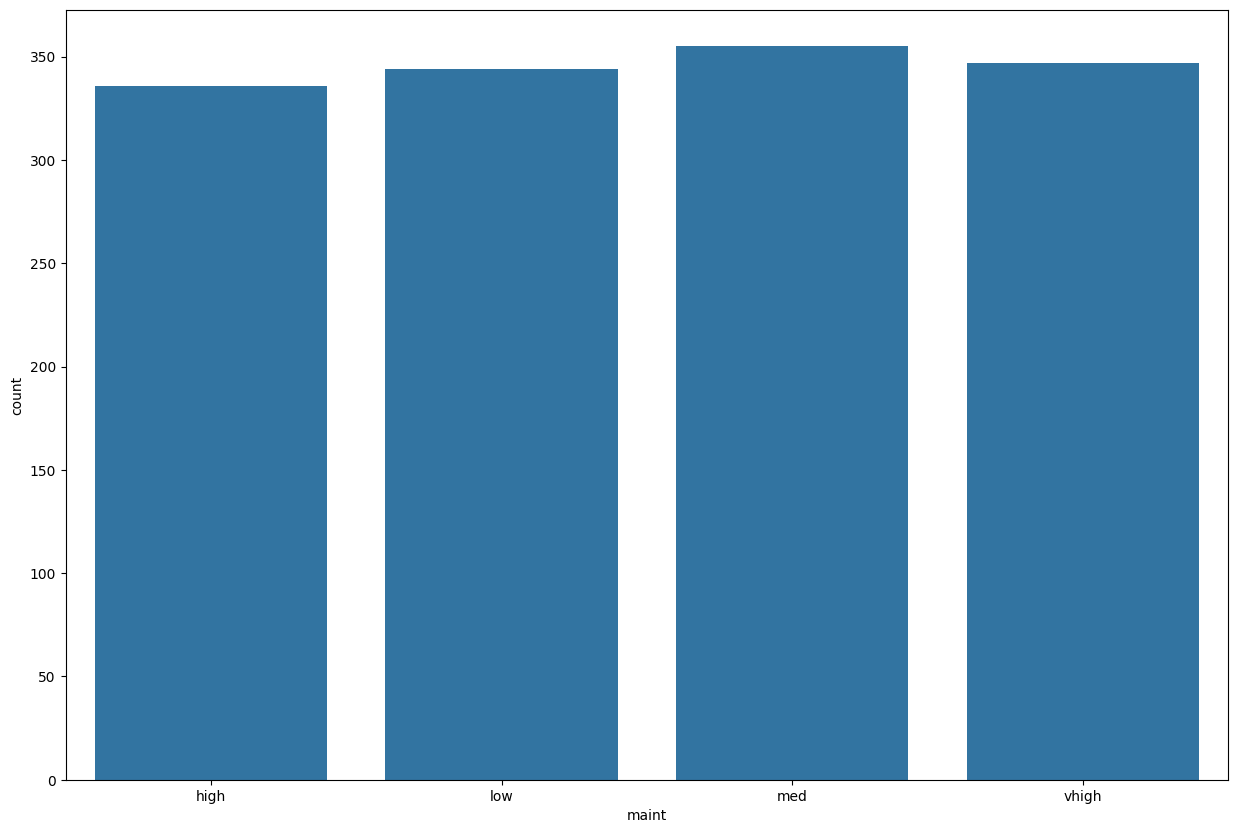

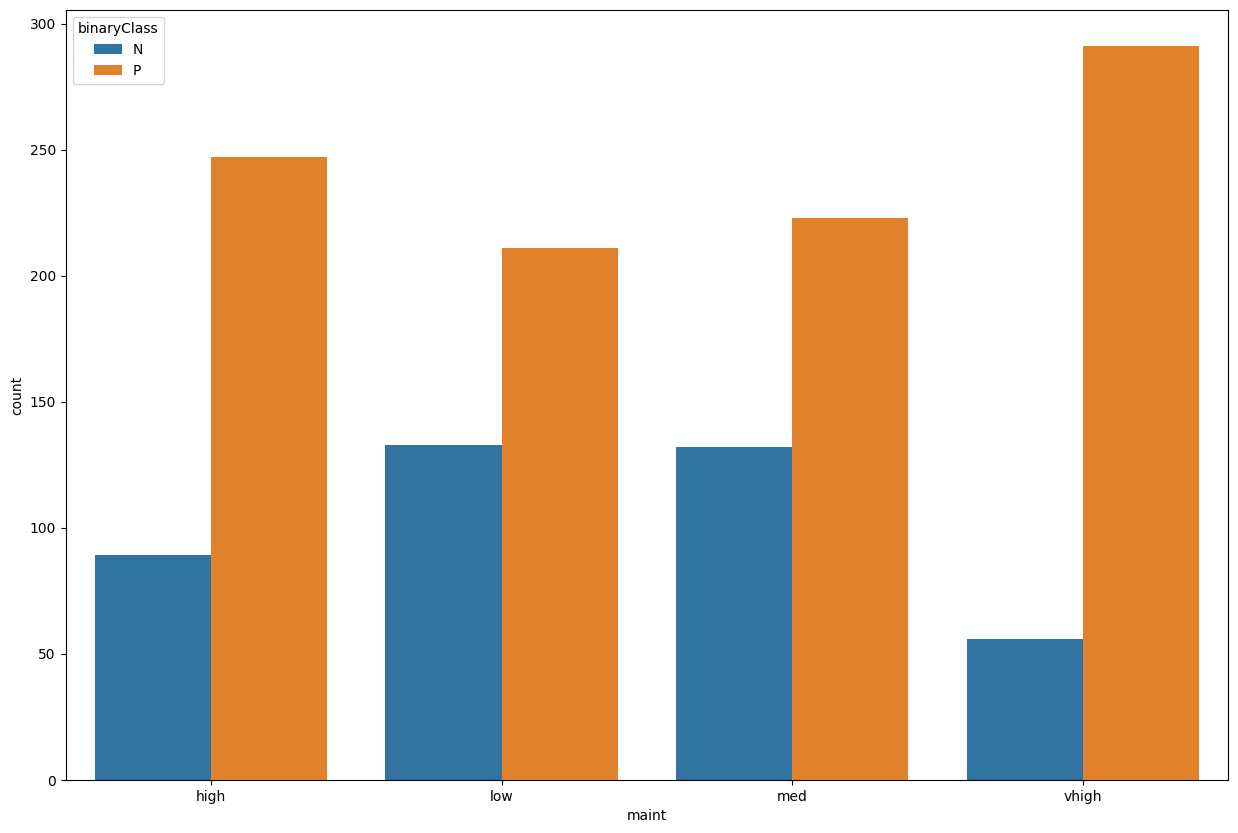

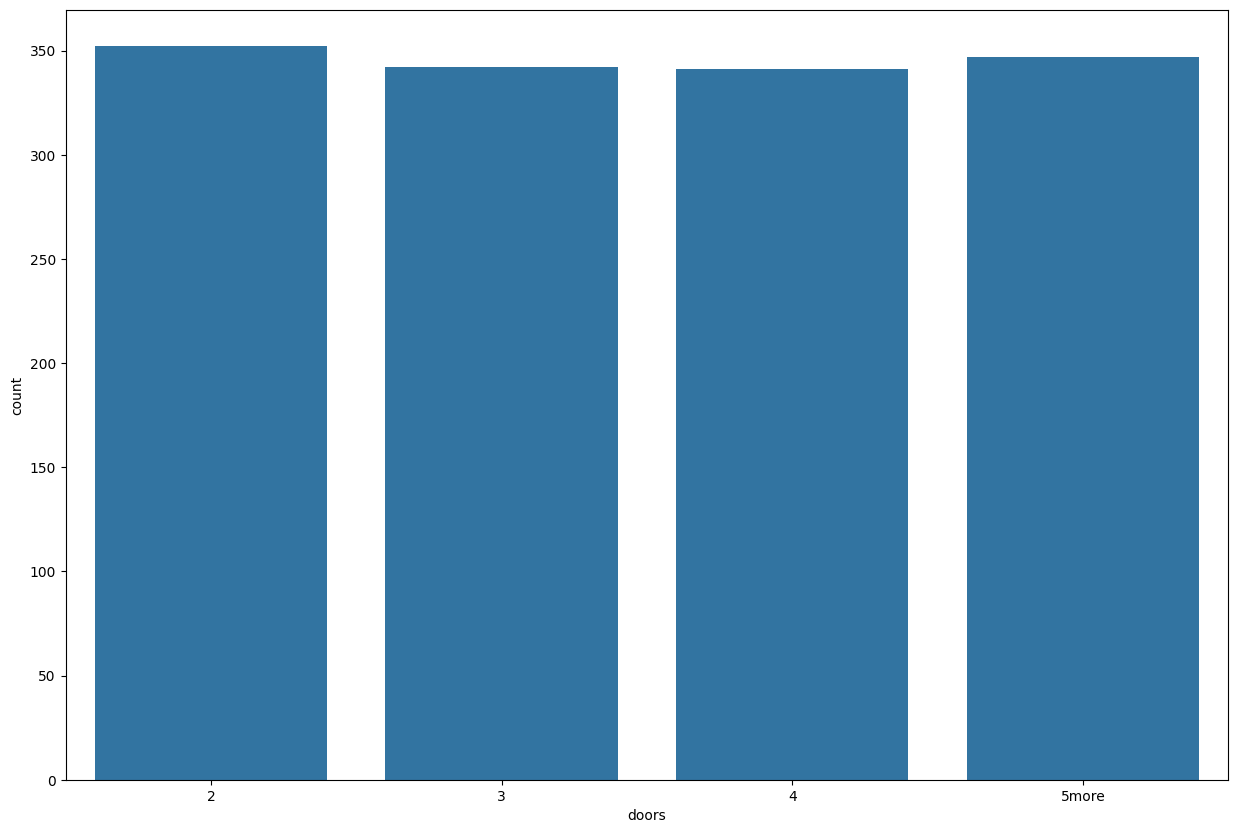

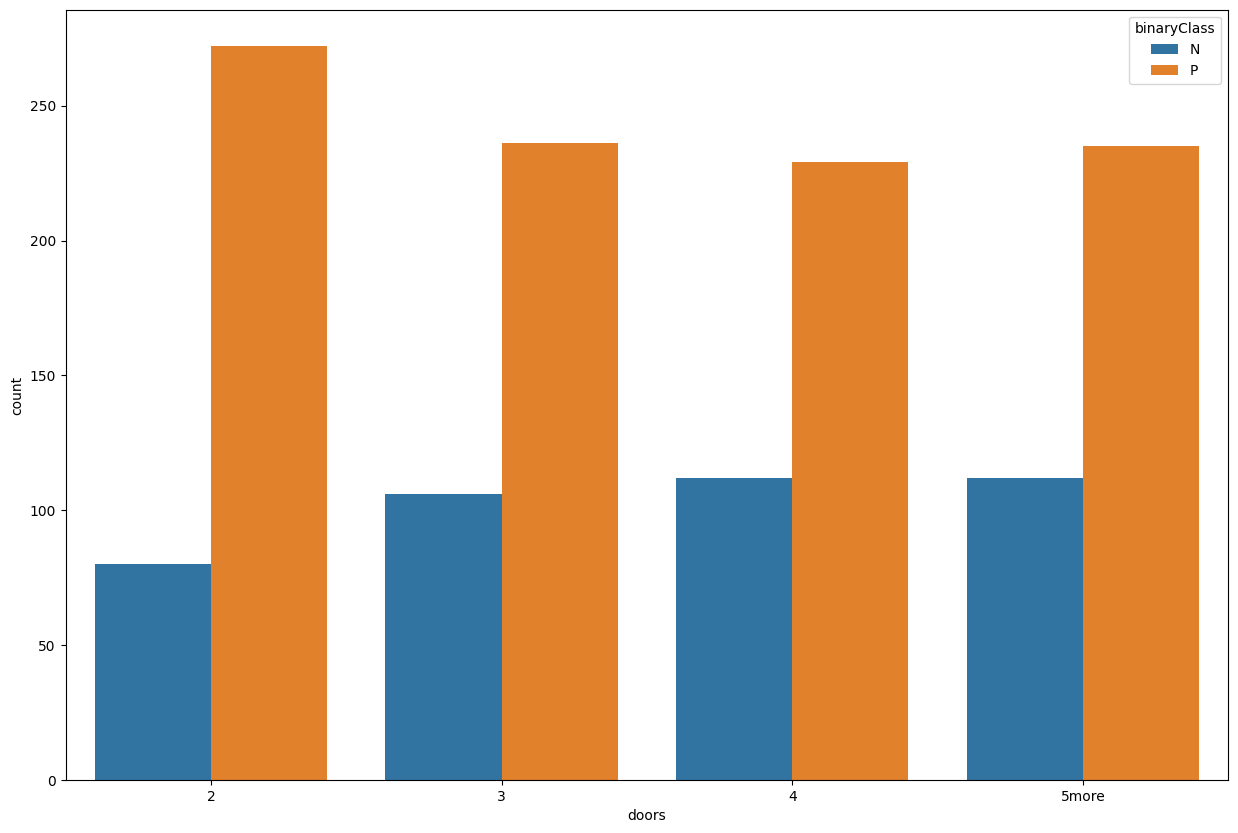

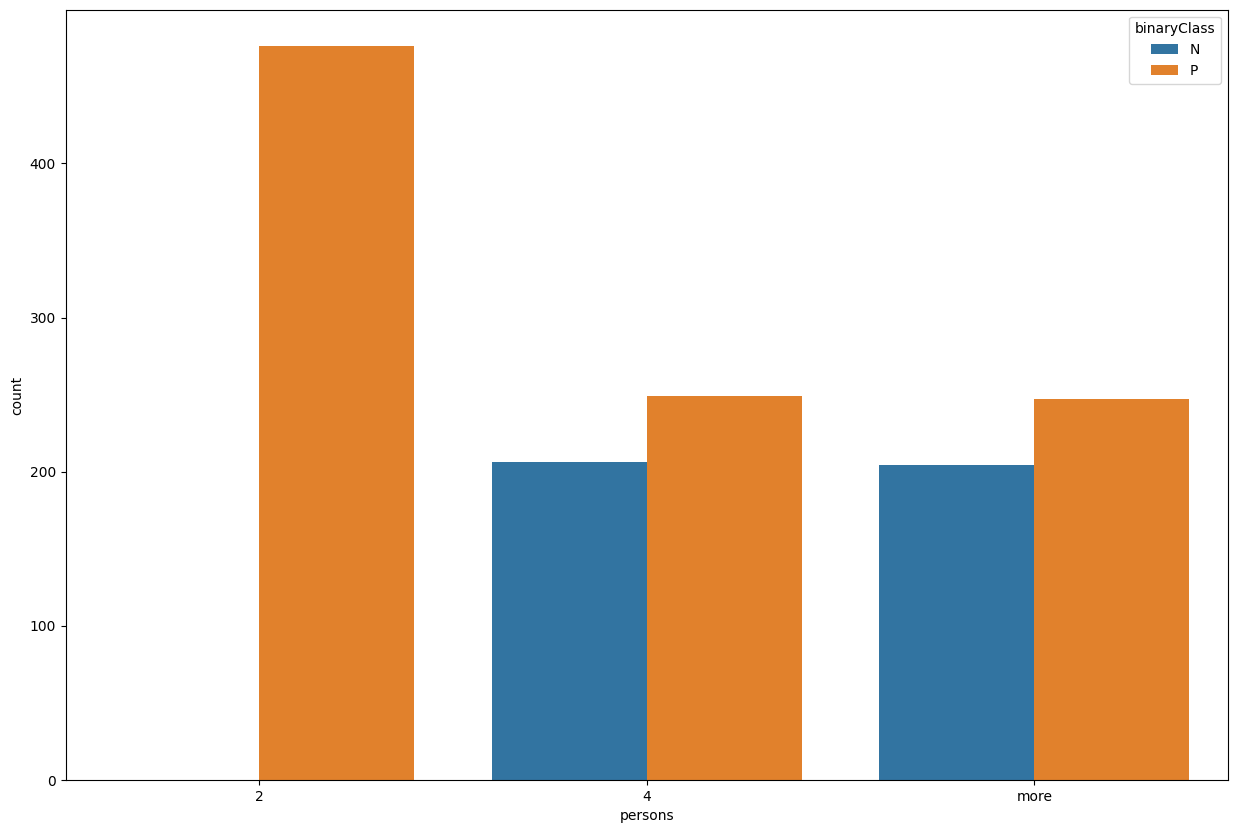

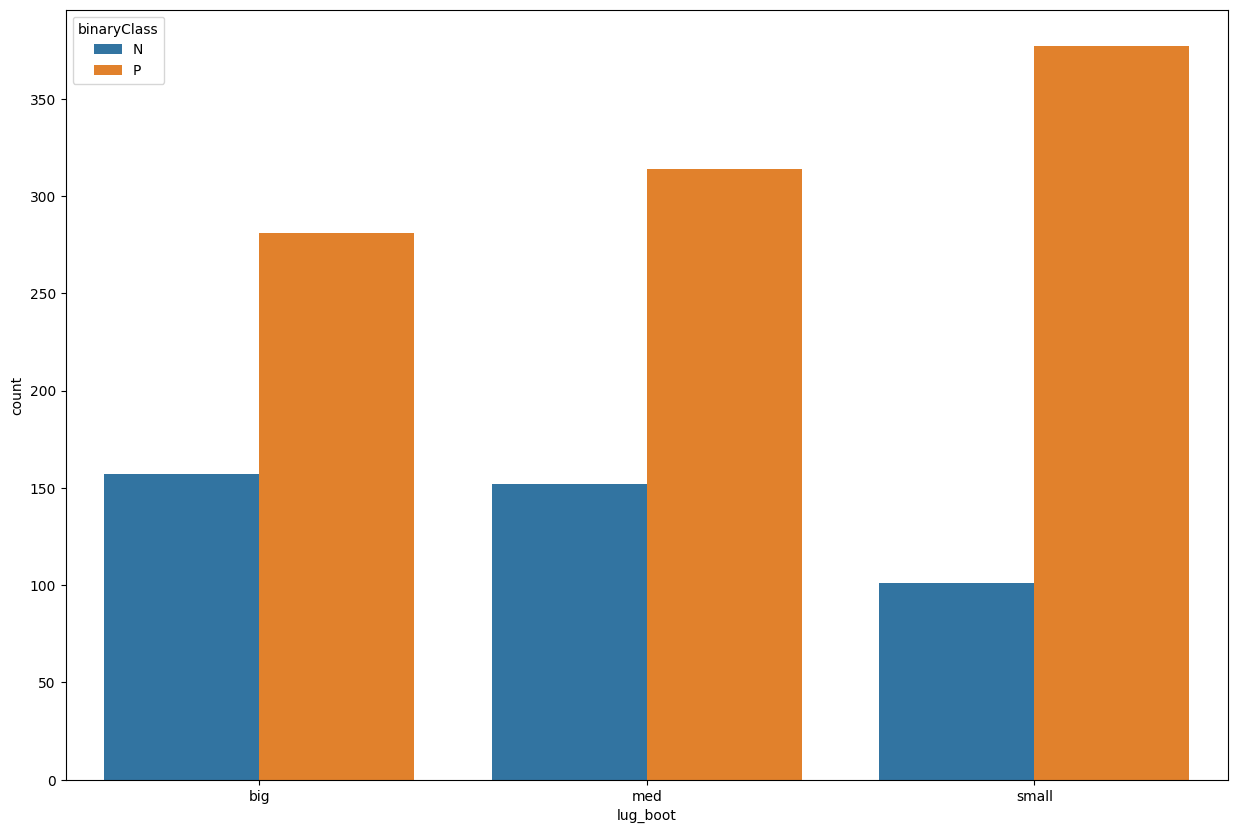

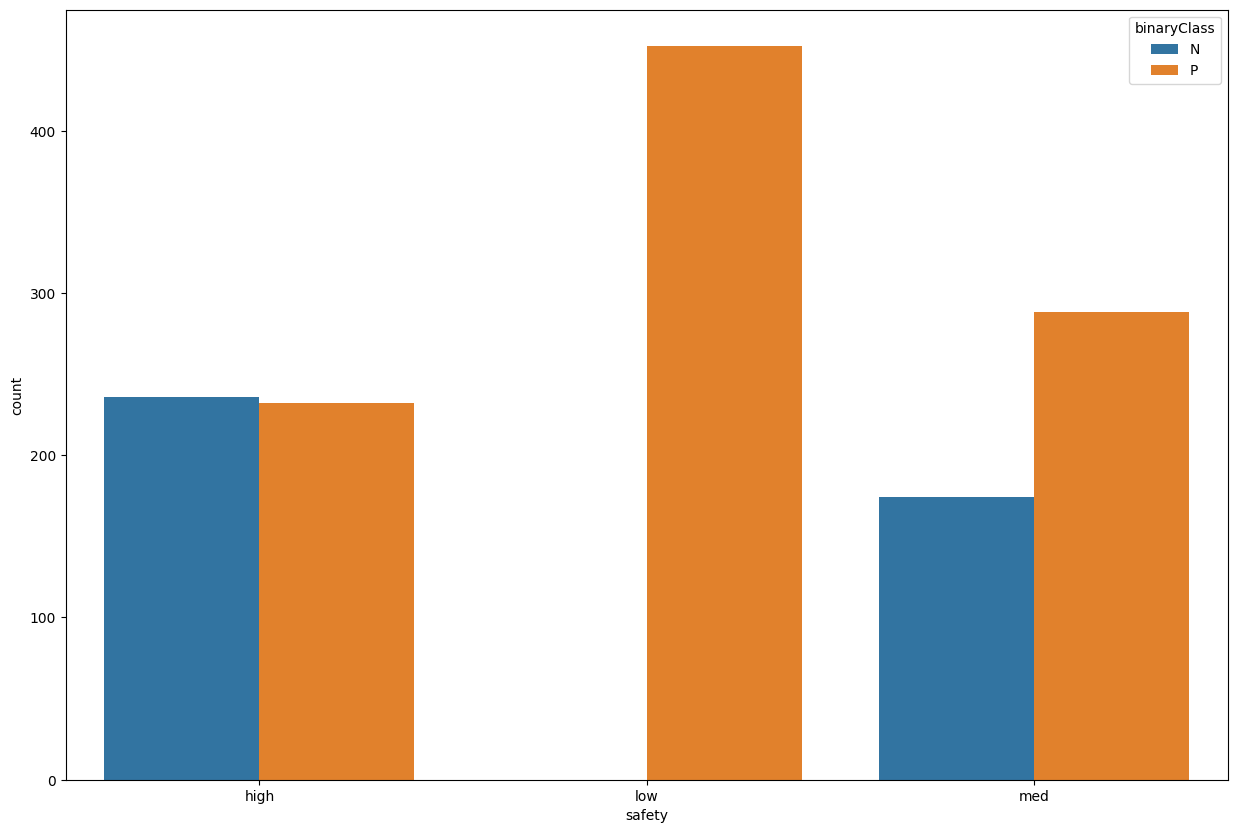

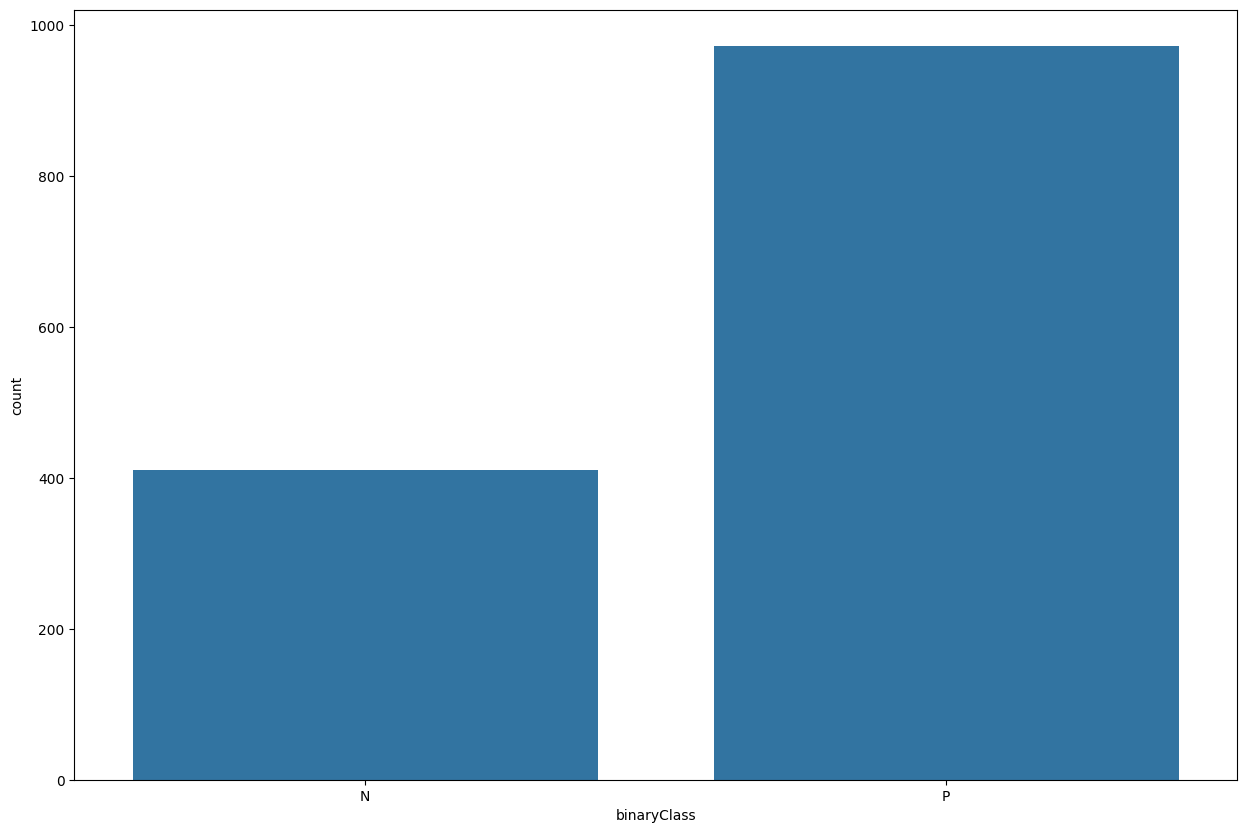

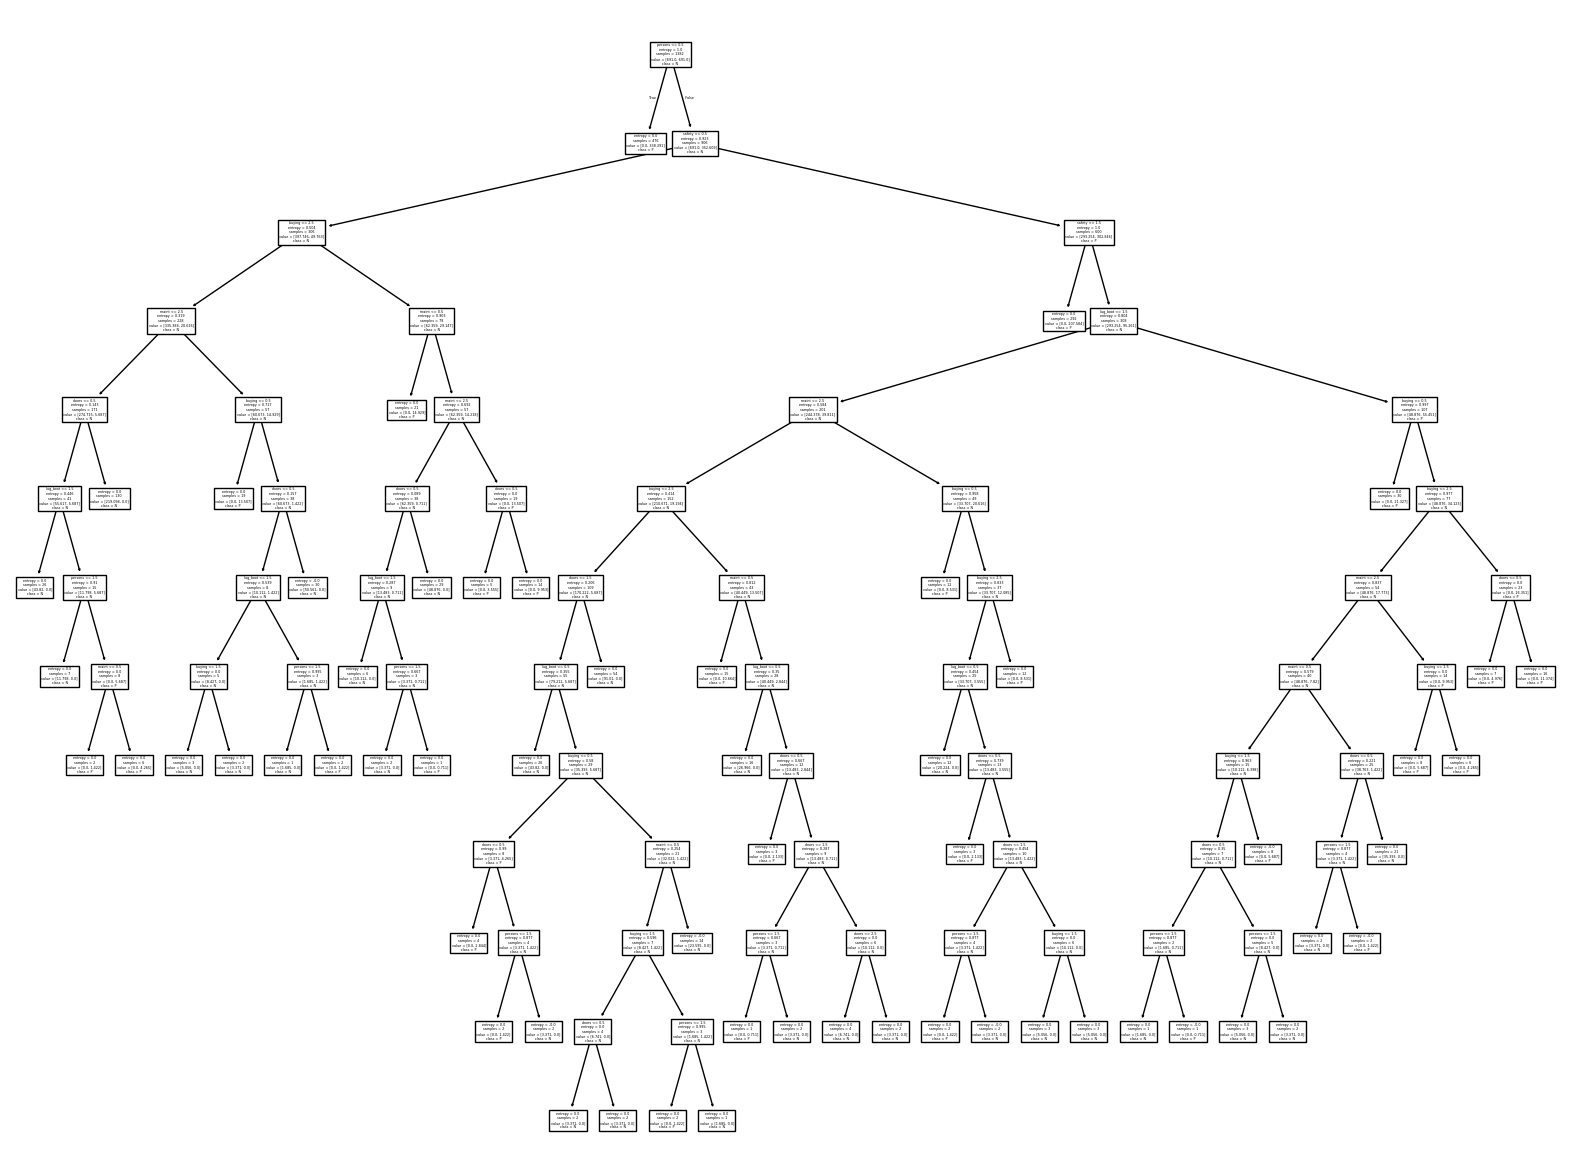

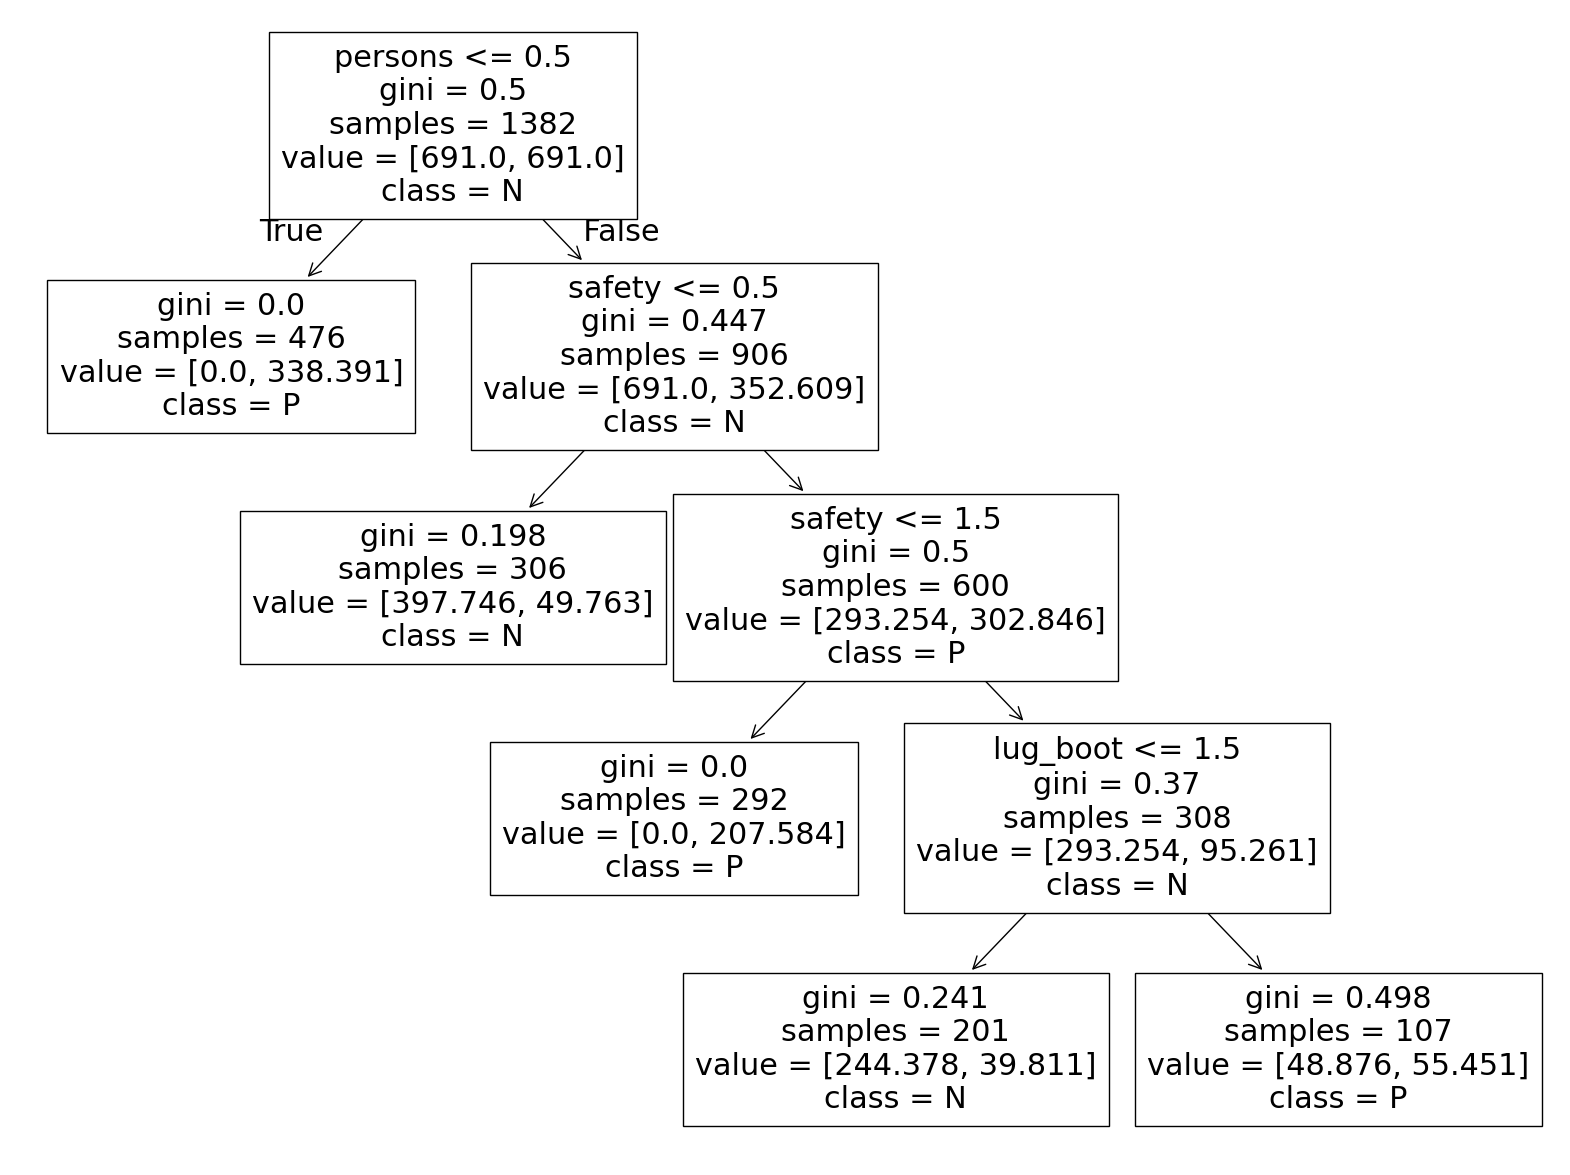

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
%matplotlib inline
fetch_openml(data_id=5).keys
from sklearn.datasets import fetch_openml

car_data = fetch_openml(name='car', version=2,
                        parser='auto')
type(car_data)
car_data.keys()
car_data.feature_names, car_data.target.value_counts()
print(car_data.DESCR)
car_data.feature_names
car_data = car_data.frame
car_data.head()
type(car_data)
l = len(car_data.columns)
for i in range(l):
  sns.jointplot(x=car_data.columns[i],y='binaryClass',
              data=car_data,palette='rainbow')
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(car_data, test_size=0.2,
                                         random_state=220)
car_data.shape, train_data.shape, test_data.shape
train_data.describe()
train_data.isnull().sum()
train_data.columns
train_data['buying'].value_counts()
train_data['maint'].value_counts()
train_data['doors'].value_counts()
train_data['persons'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying')
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying', hue='binaryClass')
train_data['maint'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint')
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint', hue='binaryClass')
train_data['doors'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors')
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors', hue='binaryClass')
train_data['persons'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='persons', hue='binaryClass')
train_data['lug_boot'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='lug_boot', hue='binaryClass')
train_data['safety'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='safety', hue='binaryClass')
train_data['binaryClass'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='binaryClass')
car_train = train_data.drop('binaryClass', axis=1)
car_labels = train_data[['binaryClass']]
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline

pipe = Pipeline([('ord_enc', OrdinalEncoder())])

car_train_prepared = pipe.fit_transform(car_train)
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

car_labels_prepared = label_enc.fit_transform(car_labels)
car_train_prepared.shape, car_labels_prepared.shape
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.set_params(class_weight='balanced', criterion='entropy')

tree_clf.fit(car_train_prepared, car_labels_prepared)
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(tree_clf, feature_names=car_train.columns,
          class_names=['N','P']);
from sklearn.metrics import accuracy_score, classification_report,\
confusion_matrix

preds = tree_clf.predict(car_train_prepared)
print(f"Accuracy:{accuracy_score(car_labels_prepared, preds)}")
print(f"ClassReport:{classification_report(car_labels_prepared,preds)}")
print(f"Confusion Matrix:{confusion_matrix(car_labels_prepared,preds)}")
accuracy_score(car_labels_prepared,preds)
tree_clf.get_params()
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

params_grid = {'max_leaf_nodes': list(range(0, 10)),
               'min_samples_split': [0,1,2, 3, 4],
               'min_samples_leaf': [0,1,2, 3, 4],
               'max_depth':[0,1,2,3,4,5],
               'max_features':[0,1,2,3,4,5],
              'max_leaf_nodes':[0,1,2,3,4,5]}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), params_grid, verbose=1, cv=3, refit=True)

grid_search.fit(car_train_prepared, car_labels_prepared)
grid_search.best_params_
grid_search.best_estimator_
tree_best = grid_search.best_estimator_
car_data.columns
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(tree_best, feature_names=car_train.columns, class_names=['N','P']);
accuracy(car_train_prepared, tree_best, car_labels_prepared)
conf_matrix(car_train_prepared, tree_best, car_labels_prepared)
class_report(car_train_prepared, tree_best, car_labels_prepared)
car_test = test_data.drop('binaryClass', axis=1)
car_test_labels = test_data['binaryClass']


car_test_prepared = pipe.transform(car_test)

car_test_labels_prepared = label_enc.transform(car_test_labels)
accuracy(car_test_prepared, tree_best, car_test_labels_prepared)
conf_matrix(car_test_prepared, tree_best, car_test_labels_prepared)
class_report(car_test_prepared, tree_best, car_test_labels_prepared)


In [7]:
from sklearn.metrics import accuracy_score
def accuracy(data, model, labels):
    predictions = model.predict(data)
    return accuracy_score(labels, predictions)


acc = accuracy(car_train_prepared, tree_best, car_labels_prepared)
print("Accuracy:", acc)

Accuracy: 0.8878437047756874


In [8]:
from sklearn.metrics import confusion_matrix
def conf_matrix(data, model, labels):
    predictions = model.predict(data)
    return confusion_matrix(labels, predictions)

In [9]:
cm = conf_matrix(car_train_prepared, tree_best, car_labels_prepared)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[381  29]
 [126 846]]


In [10]:
from sklearn.metrics import classification_report
def class_report(data, model, labels):
    predictions = model.predict(data)
    return classification_report(labels, predictions)


report = class_report(car_train_prepared, tree_best, car_labels_prepared)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.93      0.83       410
           1       0.97      0.87      0.92       972

    accuracy                           0.89      1382
   macro avg       0.86      0.90      0.87      1382
weighted avg       0.90      0.89      0.89      1382



In [11]:
class_report(car_train_prepared, tree_best,car_labels_prepared)

'              precision    recall  f1-score   support\n\n           0       0.75      0.93      0.83       410\n           1       0.97      0.87      0.92       972\n\n    accuracy                           0.89      1382\n   macro avg       0.86      0.90      0.87      1382\nweighted avg       0.90      0.89      0.89      1382\n'

In [12]:
car_test = test_data.drop('binaryClass', axis=1)
car_test_labels = test_data['binaryClass']
car_test_prepared = pipe.transform(car_test)
car_test_labels_prepared = label_enc.transform(car_test_labels)
accuracy(car_test_prepared, tree_best, car_test_labels_prepared)
conf_matrix(car_test_prepared, tree_best, car_test_labels_prepared)
class_report(car_test_prepared, tree_best, car_test_labels_prepared)

'              precision    recall  f1-score   support\n\n           0       0.77      0.94      0.85       108\n           1       0.97      0.87      0.92       238\n\n    accuracy                           0.89       346\n   macro avg       0.87      0.91      0.88       346\nweighted avg       0.91      0.89      0.90       346\n'